In [1]:
#Import all the necessary packages
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [3]:
#BOSTON DATASET
boston_raw = datasets.load_boston()

#boston_raw is of sklearn internal datatype. Converting it to pandas dataframe so we can analyze the data easier
boston = pd.DataFrame(boston_raw.data, columns=boston_raw.feature_names)
#target is the predict_to column, in this case it is medv and numerical in nature.
boston['MEDV'] = boston_raw.target

print(boston.shape)
boston.head(5)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#IRIS DATASET
iris_raw = datasets.load_iris()

#iris_raw is of sklearn internal datatype. Converting it to pandas dataframe so we can analyze the data easier
iris = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
#target is the predict_to column, in this case it is species and categorical in nature.
iris['species'] = iris_raw.target

print(iris.shape)
iris.head(5)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#IRIS DATASET
iris_train,iris_test = model_selection.train_test_split(iris,test_size=0.2)
print("IRIS DATASET: " + str(len(iris)) + " rows")
print("Train = " + str(len(iris_train)) + " rows")
print("Test = " + str(len(iris_test)) + " rows")

#Resetting index for prediction time
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

IRIS DATASET: 150 rows
Train = 120 rows
Test = 30 rows


In [7]:
#BOSTON DATASET
boston_train,boston_test = model_selection.train_test_split(boston,test_size=0.2)
print("BOSTON DATASET: " + str(len(boston)) + " rows")
print("Train = " + str(len(boston_train)) + " rows")
print("Test = " + str(len(boston_test)) + " rows")

#Resetting index for prediction time
boston_train = boston_train.reset_index(drop=True)
boston_test = boston_test.reset_index(drop=True)

BOSTON DATASET: 506 rows
Train = 404 rows
Test = 102 rows


In [8]:
iris_train.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [9]:
boston_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
boston_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000
mean,3.470412,11.409653,11.020569,0.074257,0.552180,6.256545,67.941089,3.806517,9.378713,405.29703,18.496782,358.740594,12.680718,22.458911
std,8.083317,23.262018,6.905332,0.262514,0.113477,0.689879,28.292911,2.104708,8.671143,169.42655,2.161303,89.527863,7.107269,8.933132
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.00000,12.600000,0.320000,1.920000,5.000000
25%,0.079710,0.000000,5.130000,0.000000,0.448750,5.884750,43.250000,2.084875,4.000000,277.00000,17.400000,376.092500,7.197500,17.200000
50%,0.240075,0.000000,8.560000,0.000000,0.538000,6.193000,76.250000,3.275900,5.000000,329.50000,19.100000,392.190000,11.265000,21.200000
75%,3.359358,12.500000,18.100000,0.000000,0.624000,6.581750,94.100000,5.218725,24.000000,666.00000,20.200000,396.900000,16.790000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.00000,22.000000,396.900000,36.980000,50.000000


In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
boston_train_tax = boston_train[['TAX']]
print("Range before scaling: " + str(boston_train_tax['TAX'].min()) + " - " + str(boston_train_tax['TAX'].max()))
boston_train_tax = min_max_scaler.fit_transform(boston_train_tax)
boston_train_tax_scaled = pd.DataFrame(boston_train_tax, columns=['TAX_SCALED'])
print("Range after scaling: " + str(boston_train_tax_scaled['TAX_SCALED'].min()) + " - " + str(boston_train_tax_scaled['TAX_SCALED'].max()))

Range before scaling: 187.0 - 711.0
Range after scaling: 0.0 - 1.0


In [12]:
boston_train = pd.concat([boston_train, boston_train_tax_scaled], axis=1)
boston_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_SCALED
0,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,32.7,0.185115
1,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,14.0,0.477099
2,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8,0.202290
3,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4,0.272901
4,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0,0.914122


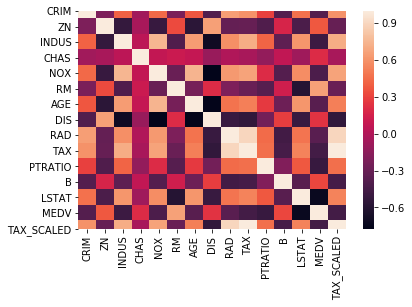

In [13]:
boston_corr_matrix = boston_train.corr()
sns.heatmap(data=boston_corr_matrix, annot=False)

In [14]:
#printing all the correlations to MEDV in descending order
boston_corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.664715
ZN            0.380664
B             0.318010
DIS           0.242080
CHAS          0.207428
RAD          -0.358711
AGE          -0.369009
CRIM         -0.383020
NOX          -0.414435
TAX_SCALED   -0.454355
TAX          -0.454355
INDUS        -0.490604
PTRATIO      -0.511957
LSTAT        -0.728322
Name: MEDV, dtype: float64

In [15]:
#In our boston dataset, we added a new column called TAX_SCALED on our train data. We need to replicate it on test.
#Generalized the code from above into a function format so we can replicate it on our test dataset.
def scaleColumn(df,column_name):
  min_max_scaler = preprocessing.MinMaxScaler()
  df_col = df[[column_name]]
  print("Range before scaling: " + str(df_col[column_name].min()) + " - " + str(df_col[column_name].max()))
  df_col_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_col), columns=[column_name + "_SCALED"])
  new_df = pd.concat([df, df_col_scaled], axis=1)
  #print("Range after scaling: " + str(df_col[column_name + "_SCALED"].min()) + " - " + str(df_col[column_name + "_SCALED"].max()))
  return new_df

In [16]:
boston_test = scaleColumn(boston_test,'TAX')
boston_test.head(5)

Range before scaling: 193.0 - 666.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_SCALED
0,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2,0.241015
1,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2,0.061311
2,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,21.5,0.175476
3,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5.0,403.0,14.7,353.89,6.43,24.3,0.443975
4,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,15.6,0.515856


In [17]:
#define input and predict to columns
iris_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_labels = ['species']

print('IRIS DATASET')
print("Features - " + str(iris_features))
print("Labels - " + str(iris_labels))

iris_train_features = iris_train[iris_features]
iris_train_labels = iris_train[iris_labels]
print('✔ Train data split into features and labels')

iris_test_features = iris_test[iris_features]
iris_test_labels = iris_test[iris_labels]
print('✔ Test data split into features and labels')

IRIS DATASET
Features - ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels - ['species']
✔ Train data split into features and labels
✔ Test data split into features and labels


In [18]:
#define input and predict to ccolumns
boston_features = ['RM', 'ZN', 'PTRATIO', 'INDUS']
boston_labels = ['MEDV']

print('BOSTON DATASET')
print("Features - " + str(boston_features))
print("Labels - " + str(boston_labels))

boston_train_features = boston_train[boston_features]
boston_train_labels = boston_train[boston_labels]
print('✔ Train data split into features and labels')

boston_test_features = boston_test[boston_features]
boston_test_labels = boston_test[boston_labels]
print('✔ Test data split into features and labels')

BOSTON DATASET
Features - ['RM', 'ZN', 'PTRATIO', 'INDUS']
Labels - ['MEDV']
✔ Train data split into features and labels
✔ Test data split into features and labels


In [19]:
#Create the model object and train
gnb = GaussianNB()
gnb.fit(iris_train_features, iris_train_labels)
#Predictions on the Test data
predictions_gnb = gnb.predict(iris_test_features)
predictions_gnb

C:\Users\user\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 2, 0, 1])

In [20]:
#Getting the probabilities for these predictions
predictions_probability_gnb = gnb.predict_proba(iris_test_features)[:, 1]
predictions_probability_gnb

array([6.90039748e-17, 6.78244188e-15, 9.38526440e-07, 2.87340514e-10,
       9.89708933e-01, 6.19196080e-07, 9.82559111e-01, 9.99728334e-01,
       4.86856226e-18, 6.78401796e-01, 9.85842134e-09, 9.77094382e-02,
       2.27710086e-16, 5.30014709e-02, 5.54835352e-01, 6.23233098e-13,
       3.33191514e-01, 1.97661565e-03, 9.01632825e-01, 3.10924447e-07,
       9.02992343e-17, 1.82677078e-01, 9.16992406e-01, 3.76373767e-04,
       9.99952478e-01, 4.98973175e-06, 9.99943726e-01, 2.17304069e-06,
       1.91708975e-17, 9.99791139e-01])

In [21]:
#Putting the above 2 cells together to create a readable df
gnb_df = pd.DataFrame(predictions_gnb.reshape(len(predictions_gnb),1))
gnb_df.rename(columns={0:'gnb_prediction'}, inplace=True)
gnb_df['gnb_probability'] = predictions_probability_gnb
gnb_df.head(5)

,gnb_prediction,gnb_probability
0,0,6.900397e-17
1,0,6.782442e-15
2,2,9.385264e-07
3,2,2.873405e-10
4,1,9.897089e-01


In [22]:
#Concatonating the predictions of naive bayes to the iris_test dataset
iris_test = iris_test.reset_index(drop=True)
iris_test_prediction = pd.concat([iris_test_labels, gnb_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability
0,0,0,6.900397e-17
1,0,0,6.782442e-15
2,2,2,9.385264e-07
3,2,2,2.873405e-10
4,1,1,9.897089e-01


In [23]:
#Create the model object and train
dt = tree.DecisionTreeClassifier()
dt.fit(iris_train_features, iris_train_labels)

#Predictions on the Test data
predictions_dt = dt.predict(iris_test_features)

#Getting the probabilities for these predictions
predictions_probability_dt = dt.predict_proba(iris_test_features)[:, 1]

#Putting the above two together to create a readable df
dt_df = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
dt_df.rename(columns={0:'dt_prediction'}, inplace=True)
dt_df['dt_probability'] = predictions_probability_dt
dt_df.head(5)

,dt_prediction,dt_probability
0,0,0.0
1,0,0.0
2,2,0.0
3,2,0.0
4,1,1.0


In [24]:
#Concatonating the predictions of decision tree to the iris_test dataset
iris_test = iris_test.reset_index(drop=True)
iris_test_prediction = pd.concat([iris_test_prediction, dt_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability
0,0,0,6.900397e-17,0,0.0
1,0,0,6.782442e-15,0,0.0
2,2,2,9.385264e-07,2,0.0
3,2,2,2.873405e-10,2,0.0
4,1,1,9.897089e-01,1,1.0


In [25]:
#Create the model object and train
logr = LogisticRegression()
logr.fit(iris_train_features, iris_train_labels)

#Predictions on the Test data
predictions_logr = logr.predict(iris_test_features)

#Getting the probabilities for these predictions
predictions_probability_logr = logr.predict_proba(iris_test_features)[:, 1]

#Putting the above predictions and probabilities together to create a readable df
logr_df = pd.DataFrame(predictions_logr.reshape(len(predictions_logr),1))
logr_df.rename(columns={0:'logr_prediction'}, inplace=True)
logr_df['logr_probability'] = predictions_probability_logr
logr_df.head(5)

C:\Users\user\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,logr_prediction,logr_probability
0,0,0.087438
1,0,0.170489
2,2,0.420738
3,2,0.165133
4,2,0.365219


In [26]:
#Concatonating the predictions of decision tree to the iris_test dataset
iris_test_prediction = pd.concat([iris_test_prediction, logr_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability
0,0,0,6.900397e-17,0,0.0,0,0.087438
1,0,0,6.782442e-15,0,0.0,0,0.170489
2,2,2,9.385264e-07,2,0.0,2,0.420738
3,2,2,2.873405e-10,2,0.0,2,0.165133
4,1,1,9.897089e-01,1,1.0,2,0.365219


In [27]:
lr = LinearRegression().fit(boston_train_features, boston_train_labels)

#Predictions on the Test data
predictions_lr = lr.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,18.522011
1,28.565749
2,21.829865
3,22.985613
4,13.996497


In [28]:
#Concatonating the predictions of decision tree to the iris_test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,13.2,18.522011
1,28.2,28.565749
2,21.5,21.829865
3,24.3,22.985613
4,15.6,13.996497


In [29]:
rfr = RandomForestRegressor().fit(boston_train_features, boston_train_labels)

#Predictions on the Test data
predictions_rfr = rfr.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
rfr_df = pd.DataFrame(predictions_rfr.reshape(len(predictions_rfr),1))
rfr_df.rename(columns={0:'rfr_prediction'}, inplace=True)
rfr_df.head(5)

C:\Users\user\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


,rfr_prediction
0,20.05
1,30.07
2,22.38
3,24.09
4,15.66


In [30]:
#Concatonating the predictions of decision tree to the iris_test dataset
boston_test_prediction = pd.concat([boston_test_prediction, rfr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction
0,13.2,18.522011,20.05
1,28.2,28.565749,30.07
2,21.5,21.829865,22.38
3,24.3,22.985613,24.09
4,15.6,13.996497,15.66


In [32]:
svm = svm.SVR().fit(boston_train_features, boston_train_labels)

#Predictions on the Test data
predictions_svm = svm.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
svm_df = pd.DataFrame(predictions_svm.reshape(len(predictions_svm),1))
svm_df.rename(columns={0:'svm_prediction'}, inplace=True)
svm_df.head(5)

C:\Users\user\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,svm_prediction
0,19.480816
1,26.833773
2,23.450934
3,21.112254
4,18.296237


In [33]:
#Concatonating the predictions of decision tree to the iris_test dataset
boston_test_prediction = pd.concat([boston_test_prediction, svm_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction,rfr_prediction,svm_prediction
0,13.2,18.522011,20.05,19.480816
1,28.2,28.565749,30.07,26.833773
2,21.5,21.829865,22.38,23.450934
3,24.3,22.985613,24.09,21.112254
4,15.6,13.996497,15.66,18.296237


In [34]:
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability
0,0,0,6.900397e-17,0,0.0,0,0.087438
1,0,0,6.782442e-15,0,0.0,0,0.170489
2,2,2,9.385264e-07,2,0.0,2,0.420738
3,2,2,2.873405e-10,2,0.0,2,0.165133
4,1,1,9.897089e-01,1,1.0,2,0.365219


In [38]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['gnb_prediction'])

0.9666666666666667

In [39]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['dt_prediction'])

0.9333333333333333

In [36]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_prediction'])

0.9666666666666667

In [40]:
#Create the model object and train
logr_v2 = LogisticRegression(max_iter=500,fit_intercept=False)
logr_v2.fit(iris_train_features, iris_train_labels)

#Predictions on the Test data
predictions_logr_v2 = logr_v2.predict(iris_test_features)

#Getting the probabilities for these predictions
predictions_probability_logr_v2 = logr_v2.predict_proba(iris_test_features)[:, 1]

#Putting the above predictions and probabilities together to create a readable df
logr_v2_df = pd.DataFrame(predictions_logr_v2.reshape(len(predictions_logr_v2),1))
logr_v2_df.rename(columns={0:'logr_v2_prediction'}, inplace=True)
logr_v2_df['logr_v2_probability'] = predictions_probability_logr_v2
logr_v2_df.head(5)

C:\Users\user\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,logr_v2_prediction,logr_v2_probability
0,0,0.092304
1,0,0.164748
2,2,0.433841
3,2,0.171111
4,2,0.335823


In [41]:
#Concatonating the predictions of decision tree to the iris_test dataset
iris_test_prediction = pd.concat([iris_test_prediction, logr_v2_df], axis=1)
iris_test_prediction.head(5)

,species,gnb_prediction,gnb_probability,dt_prediction,dt_probability,logr_prediction,logr_probability,logr_v2_prediction,logr_v2_probability
0,0,0,6.900397e-17,0,0.0,0,0.087438,0,0.092304
1,0,0,6.782442e-15,0,0.0,0,0.170489,0,0.164748
2,2,2,9.385264e-07,2,0.0,2,0.420738,2,0.433841
3,2,2,2.873405e-10,2,0.0,2,0.165133,2,0.171111
4,1,1,9.897089e-01,1,1.0,2,0.365219,2,0.335823


In [42]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_prediction'])

0.9666666666666667

In [43]:
accuracy_score(iris_test_prediction['species'], iris_test_prediction['logr_v2_prediction'])

0.9666666666666667

In [44]:
def maxAccuracy(df, actual_value, model_pred_list):
  max_model = ''
  max_accuracy = 0
  for model in model_pred_list:
    acc = accuracy_score(df[actual_value], df[model])
    if acc > max_accuracy:
      max_model = model
      max_accuracy = acc

  print("MAX: " + max_model + " - " + str(max_accuracy))

In [45]:
maxAccuracy(iris_test_prediction,'species',['gnb_prediction','dt_prediction','logr_prediction','logr_v2_prediction'])

MAX: gnb_prediction - 0.9666666666666667
